### Comparison between fitting - Linear Regression and RANSAC regression

#### Reference - https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
# Define samples and outliers
n_samples = 1000
n_outliers = 50

In [3]:
# Define X Y and COEF
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

In [4]:
# printing components
print(X.shape, y.shape, coef)

(1000, 1) (1000,) 82.1903908407869


In [5]:
# Add outlier data
np.random.seed(0) #for same output 
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [6]:
# Linear Regressor
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

In [7]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [8]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

In [9]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


#### RANSAC estimation is better than Linear Estimations - almost equal coefficient

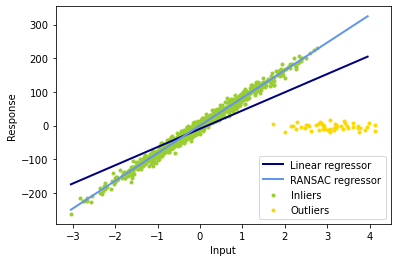

In [10]:
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

Observed :

n_samples = 500
n_outliers = 25
Estimated coefficients (true, linear regression, RANSAC):
45.705876133136734 [29.22202006] [45.49106226]

n_samples = 1000
n_outliers = 25
Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [63.79365652] [82.11806316]


n_samples = 10000
n_outliers = 100
Estimated coefficients (true, linear regression, RANSAC):
9.566664723066065 [8.59092755] [11.34489522]

n_samples = 10000
n_outliers = 1000
Estimated coefficients (true, linear regression, RANSAC):
9.566664723066065 [4.48222639] [7.62774268]

n_samples = 10000
n_outliers = 5000
Estimated coefficients (true, linear regression, RANSAC):
9.566664723066065 [0.85034141] [-0.33440958]

n_samples = 10000
n_outliers = 10000
Estimated coefficients (true, linear regression, RANSAC):
9.566664723066065 [-0.15604951] [2.87261112]